In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from mpl_toolkits import mplot3d
from matplotlib import cm
import glob
from itertools import count
import random
from IPython.display import HTML
import matplotlib.animation as animation


In [2]:
# Import all the files 
path_dem = "data/raw_datasets/DEM" # Modify the path
allfiles_dem = glob.glob(path_dem + '/*.txt')
seq = 1

In [3]:
header_dem = ["X","Y","Z"]
DEM = pd.read_csv(allfiles_dem[seq],names = header_dem, delim_whitespace=True) 
DEM.head()

,X,Y,Z
0,50.0,50.0,0.00000
1,150.0,50.0,0.01922
2,250.0,50.0,-0.13374
3,350.0,50.0,-0.40252
4,450.0,50.0,-0.63374


In [4]:
# Convert dataframe to numpy array for calculation
X = DEM["X"].to_numpy()
Y = DEM["Y"].to_numpy()
Z = DEM["Z"].to_numpy()

# Num ber of grid used for spatial discritisation
N = 64

# Reshape both X and Y direction grids, forming the checkerboard-like array 
X = np.reshape(X, (N, N))
Y = np.reshape(Y, (N, N))

# Reshape the Elevation data to 64 x 64 
Z = np.reshape(Z, (N, N))

In [5]:
print(len(DEM))

4096


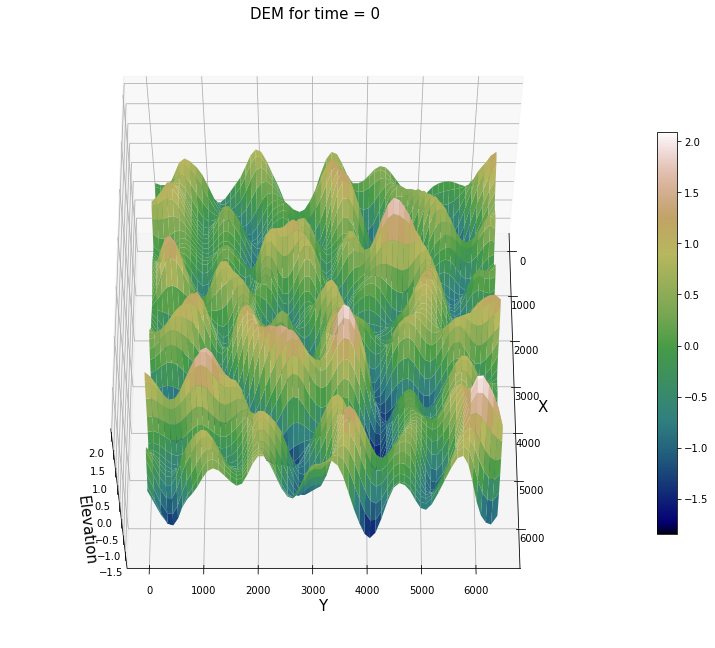

In [6]:
color_dem = cm.gist_earth
zmax = np.max(Z)
zmin = np.min(Z)
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap = color_dem, edgecolor='none',vmin=zmin, vmax=zmax)
ax.set_title('surface');
ax.view_init(60, 0)

# Set the labels and fontsize
ax.set_title('DEM for time = 0')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)

# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap=color_dem)
m.set_array(Z)
plt.colorbar(m,fraction=0.03)
plt.show()

# Bivariate B-spline representation of a surface

In [7]:
# tck = interpolate.bisplrep(X, Y, Z, s=0)
# znew = interpolate.bisplev(X[0,:], Y[:,0], tck)

In [8]:
# plt.figure(figsize = (8,8))
# plt.pcolormesh(X, Y, znew, shading='auto',cmap =  cm.gist_earth,vmin=-4, vmax=4)
# plt.title("Plain Visualisation DEM at t = 0")

# # converts the values of any array to RGB colors defined by a colormap
# s = cm.ScalarMappable(cmap=cm.gist_earth)
# s.set_array(znew)
# plt.colorbar(s)
# plt.show()

# Water Depth Data

In [9]:
path_wd = "data/raw_datasets/WD"
allfiles_wd = glob.glob(path_wd + '/*.txt')

In [10]:
# Note that the imported wd file here has two dimension with the column value is the water depth
# Row one is the time
data = np.loadtxt(allfiles_wd[seq])
print(np.shape(data))

# simulation time 
t = 35

# Extract the water depth value at specific time
wd = np.reshape(data[t],(N,N))

(97, 4096)


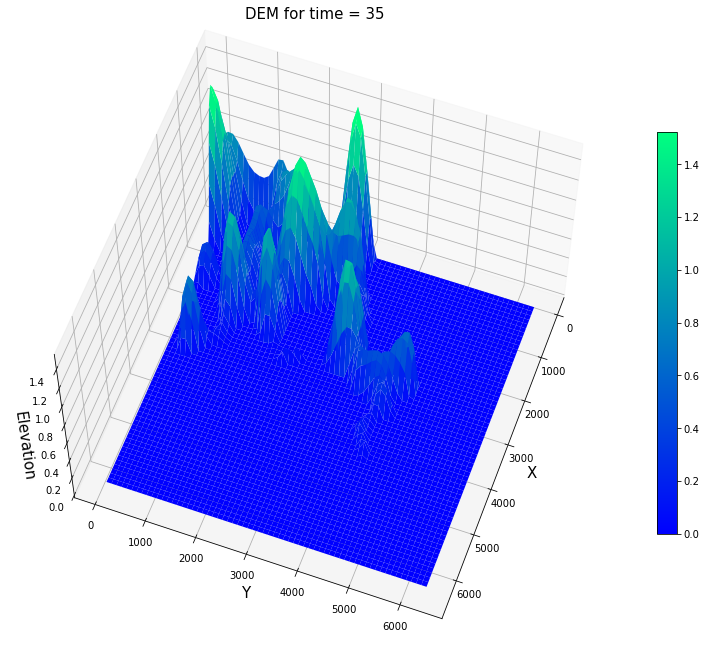

In [11]:
color_wd = 'winter'
fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, wd, rstride=1, cstride=1,cmap = color_wd, edgecolor='none')
ax.set_title('surface');
ax.view_init(60, 20)

# Set the labels and fontsize
ax.set_title(f'DEM for time = {t}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)

# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap=color_wd)
m.set_array(wd)
plt.colorbar(m,fraction=0.03)
plt.show()

# Overlap water depth and terrain

<ipython-input-12-82febecdee01>:21: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, newh, rstride=1, cstride=1, cmap = 'Blues',linewidth=0, vmin=np.min(h), vmax=np.max(h))


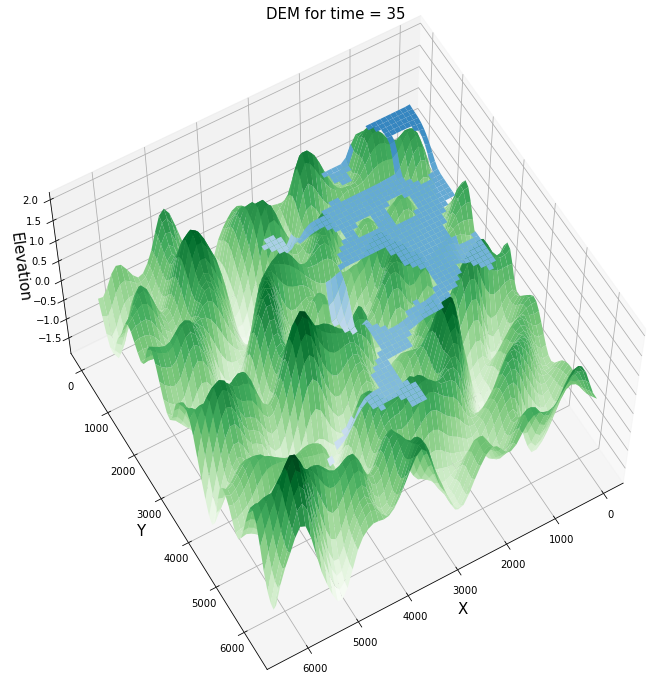

In [12]:
color_dem = cm.gist_earth
zmax = np.max(Z)
zmin = np.min(Z)

fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection='3d')


# Ploting the flooding area (concept of convolution)
h = wd + Z
# Create the mask
mask = np.zeros((N,N))
mask[wd != 0] = 1

# Create the modified water depth
newh = mask * h
newh[newh == 0] = np.nan

# DEM + water depth
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap = 'Greens', linewidth=0, edgecolor='none',alpha = 1)
ax.plot_surface(X, Y, newh, rstride=1, cstride=1, cmap = 'Blues',linewidth=0, vmin=np.min(h), vmax=np.max(h))
# surf = ax.plot_surface(X, Y, newh, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=-1, vmax=1)


ax.set_title('surface');
ax.view_init(60, 60)

# Set the labels and fontsize
ax.set_title(f'DEM for time = {t}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)


# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap=color_dem)
m.set_array(Z)
# plt.colorbar(m,fraction=0.03)
plt.show()

#  3D Animation for Flooding

<IPython.core.display.Javascript object>


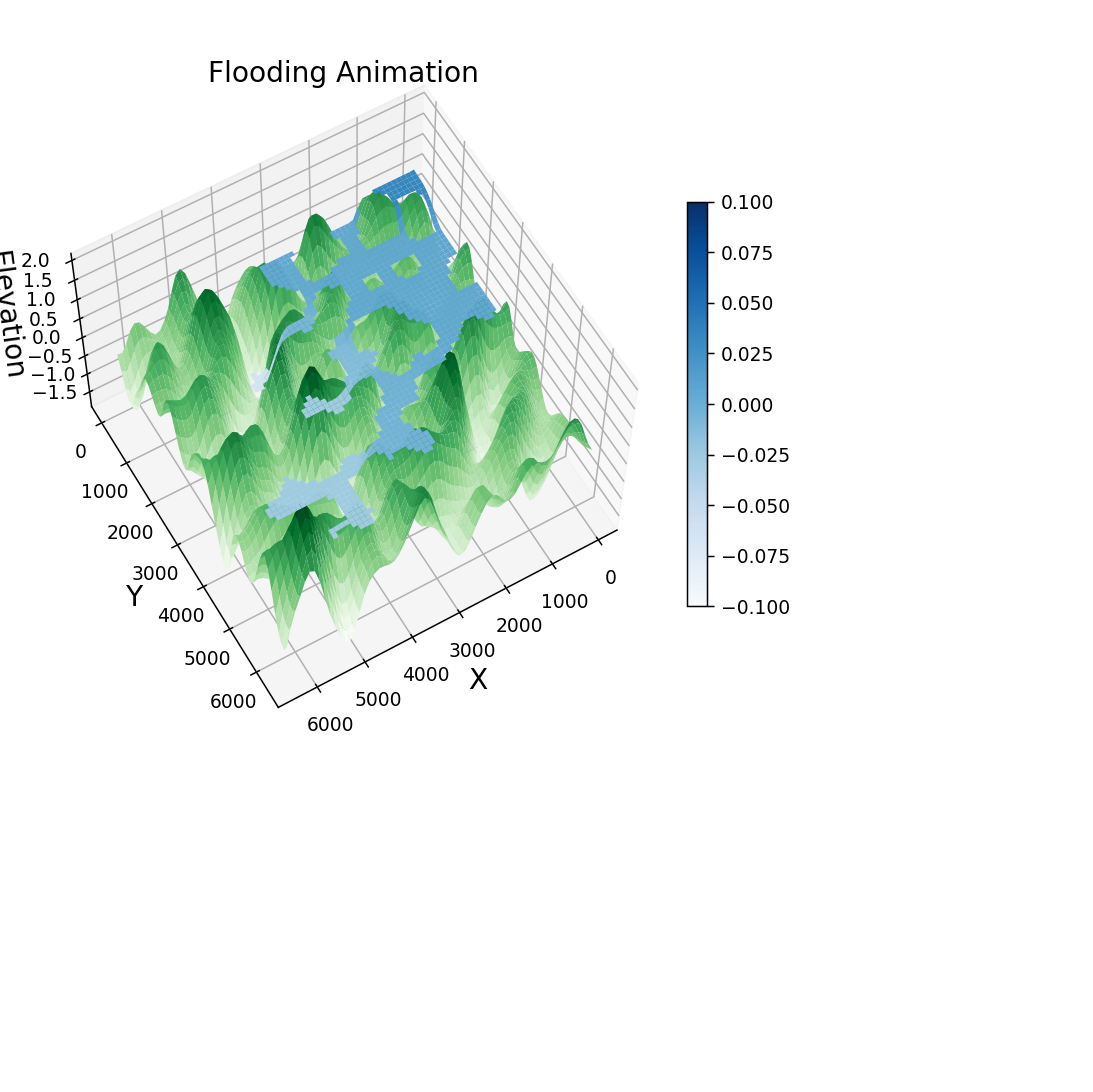

<ipython-input-13-fd3193754230>:31: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  plot = [ax.plot_surface(X, Y, newh[0], rstride=1, cstride=1, cmap = 'Blues',linewidth=0, vmin=np.min(h), vmax=np.max(h))]


In [13]:
%matplotlib notebook

# Create the mask
wd = []
h = []
newh = []
data_length = len(data)

# Create the modified water depth
for i in range(len(data)):
    wd.append(np.reshape(data[i],(N,N))) 
    h.append(wd[i] + Z)
    mask = np.zeros((N,N))
    mask[wd[i] != 0] = 1
    newh.append(mask * h[i]) 
    newh[i][newh[i] == 0] = np.nan


plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.autolayout"] = True
frn = len(data)
fps = 250

def change_plot(frame_number, newh, plot):
   plot[0].remove()
   plot[0] = ax.plot_surface(X, Y, newh[frame_number], rstride=1, cstride=1, cmap = 'Blues',linewidth=0, vmin=np.min(h), vmax=np.max(h))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = [ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap = 'Greens', linewidth=0, edgecolor='none',alpha = 1)]
plot = [ax.plot_surface(X, Y, newh[0], rstride=1, cstride=1, cmap = 'Blues',linewidth=0, vmin=np.min(h), vmax=np.max(h))]



ax.view_init(60, 60)

# Set the Title, labels, and fontsize

ax.set_title('Flooding Animation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Elevation')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.zaxis.get_label().set_fontsize(15)
ax.title.set_fontsize(15)


# converts the values of any array to RGB colors defined by a colormap
m = cm.ScalarMappable(cmap='Blues')
m.set_array(newh[0])
plt.colorbar(m,fraction=0.03)

ani = animation.FuncAnimation(fig, change_plot, frn, fargs=(newh, plot), interval=1)

plt.show()
